## Alternative Model (Preprocessing)
You need to run this before you run notebook 4b.

The wavs in your dataset will be converted to 9bit linear and 80-band mels.

In [12]:
from multiprocess import Pool, cpu_count
import math, pickle, os, glob
import numpy as np
from utils.display import *
from utils.dsp import *
import python_speech_features as psf
import scipy.io.wavfile as wavfile

In [13]:
bits = 9
notebook_name = 'nb4'

In [14]:
# Point SEG_PATH to a folder containing your training wavs 
# Doesn't matter if it's LJspeech, CMU Arctic etc. it should work fine
SEG_PATH = f'D:/Workspace/DT2112/WaveRNN-master/notebooks/nb4a/wav'
DATA_PATH = f'D:/Workspace/DT2112/WaveRNN-master/notebooks/nb4a/data'

In [15]:
%mkdir -p $DATA_PATH

La syntaxe de la commande n'est pas correcte.


In [16]:
def get_files(path, extension='.wav') :
    filenames = []
    for filename in glob.iglob(f'{path}/**/*{extension}', recursive=True):
        filenames += [filename]
    return filenames

In [17]:
wav_files = get_files(SEG_PATH)
len(wav_files)

1123

In [24]:
#def convert_file(path) :
 #   wav = load_wav(path, encode=False)
  #  mel = melspectrogram(wav)
   # quant = (wav + 1.) * (2**bits - 1) / 2
    #return mel.astype(np.float32), quant.astype(np.int)

In [25]:
def convert_file(path,winlen=0.01,winstep=0.005) :
    wav = load_wav(path, encode=False)
    rate,sig = wavfile.read(path)
    mel = melspectrogram(wav)
    quant = (wav + 1.) * (2**bits - 1) / 2
    return mel.astype(np.float32), quant.astype(np.int)

In [9]:
m, x = convert_file(wav_files[0])

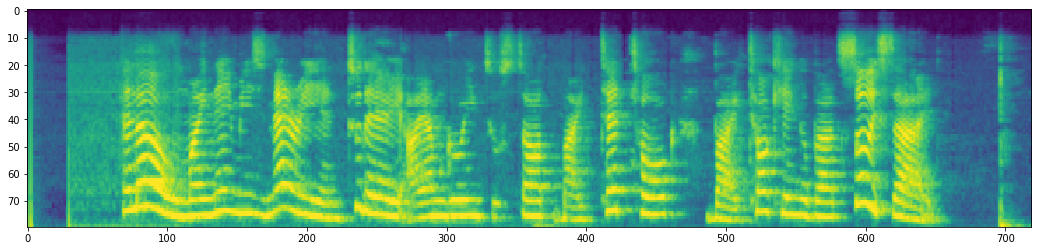

In [10]:
plot_spec(m)

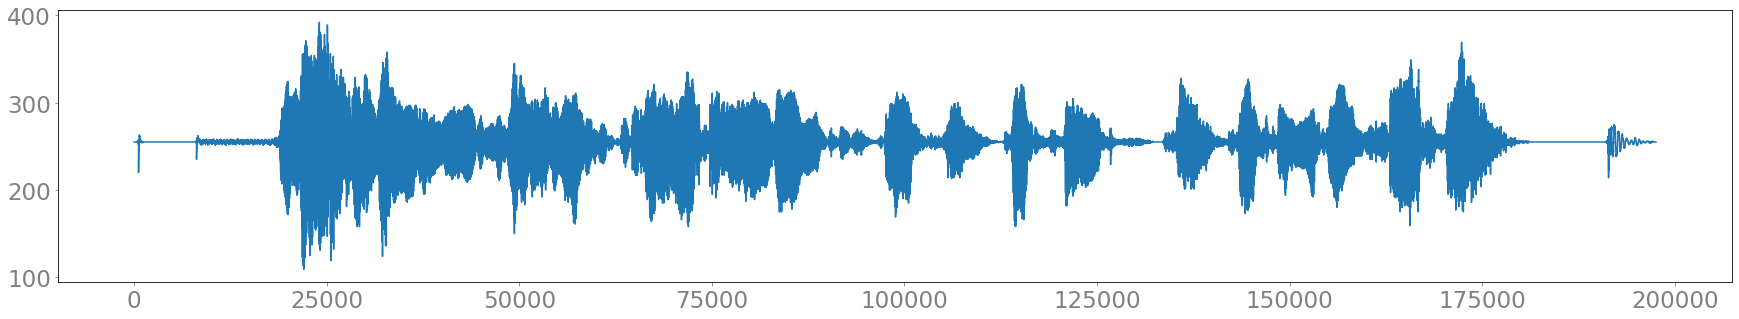

In [11]:
plot(x)

In [12]:
x = 2 * x / (2**bits - 1) - 1

In [13]:
librosa.output.write_wav(DATA_PATH + 'test_quant.wav', x, sr=sample_rate)

In [14]:
QUANT_PATH = DATA_PATH + '/quant/'
MEL_PATH = DATA_PATH + '/mel/'
#%mkdir -p $QUANT_PATH
#%mkdir -p $MEL_PATH

In [18]:
wav_files[0].split('/')[-1][:-4].split("\\")[-1]

'Enregistrement'

In [19]:
def process_wav(path) :
    id = path.split('/')[-1][:-4].split("\\")[-1]
    m, x = convert_file(path)
    np.save(f'{MEL_PATH}{id}.npy', m)
    np.save(f'{QUANT_PATH}{id}.npy', x)
    return id

In [37]:
# This will take a while depending on size of dataset
dataset_ids = []
for elt in wav_files:
    dataset_ids+=[process_wav(elt)]


In [38]:
with open(DATA_PATH + '/dataset_ids.pkl', 'wb') as f:
    pickle.dump(dataset_ids, f)

In [39]:
len(dataset_ids)

1120

In [20]:
process_wav("C:/Users/msarb/Downloads/lisqo-n8uql.wav")

'lisqo-n8uql'

In [33]:
id = DATA_PATH + '/KarinKommentar.wav'.split('/')[-1][:-4].split("\\")[-1]
wav = load_wav(DATA_PATH + 'KarinKommentar.wav', encode=False)
rate,sig = wavfile.read(DATA_PATH + '/KarinKommentar.wav')

rate.shape

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Workspace\\DT2112\\WaveRNN-master\\notebooks\\nb4a\\dataKarinKommentar.wav'

In [ ]:

mel = melspectrogram(wav)
quant = (wav + 1.) * (2**bits - 1) / 2
mel, quant = mel.astype(np.float32), quant.astype(np.int)

np.save(f'{MEL_PATH}{id}.npy', mel)
np.save(f'{QUANT_PATH}{id}.npy', quant)